# Analyse Factorielle des correspondances

In [ ]:
import pandas as pd
from prince import MCA
import matplotlib.pyplot as plt
import numpy as np
from fanalysis.ca import CA



In [60]:
data = {'Chatains': [119, 54, 29, 84],
        'Roux': [26, 14, 14, 17],
        'Blonds': [7, 10, 16, 94]}
index = ['Marrons', 'Noisette', 'Verts', 'Bleus']

df = pd.DataFrame(data, index=index)
d=df.loc[df.index]
d

,Chatains,Roux,Blonds
Marrons,119,26,7
Noisette,54,14,10
Verts,29,14,16
Bleus,84,17,94


In [61]:
print(df)

          Chatains  Roux  Blonds
Marrons        119    26       7
Noisette        54    14      10
Verts           29    14      16
Bleus           84    17      94


In [62]:
# le nombre total d'observations
total = df.values.sum()

# Calcul du frequences relatives
frequencies = df / total

print(total)

484


In [63]:
print(frequencies)

fr=frequencies.loc[frequencies.index]
fr

          Chatains      Roux    Blonds
Marrons   0.245868  0.053719  0.014463
Noisette  0.111570  0.028926  0.020661
Verts     0.059917  0.028926  0.033058
Bleus     0.173554  0.035124  0.194215


,Chatains,Roux,Blonds
Marrons,0.245868,0.053719,0.014463
Noisette,0.111570,0.028926,0.020661
Verts,0.059917,0.028926,0.033058
Bleus,0.173554,0.035124,0.194215


In [64]:
#matrice de frequence
frequencies_matrix = np.matrix(frequencies)

# ajouter les marge à la matrice de frequence
frequencies_matrix_with_margins = np.append(frequencies_matrix, 
                                             np.sum(frequencies_matrix, axis=0), 
                                             axis=0)
frequencies_matrix_with_margins = np.append(frequencies_matrix_with_margins, 
                                             np.sum(frequencies_matrix_with_margins, axis=1), 
                                             axis=1)



print("matrice de frequence:\n",frequencies_matrix)
print("matrice de frequence avec marges:\n",frequencies_matrix_with_margins)

matrice de frequence:
 [[0.24586777 0.05371901 0.01446281]
 [0.11157025 0.02892562 0.02066116]
 [0.05991736 0.02892562 0.03305785]
 [0.17355372 0.03512397 0.19421488]]
matrice de frequence avec marges:
 [[0.24586777 0.05371901 0.01446281 0.31404959]
 [0.11157025 0.02892562 0.02066116 0.16115702]
 [0.05991736 0.02892562 0.03305785 0.12190083]
 [0.17355372 0.03512397 0.19421488 0.40289256]
 [0.59090909 0.14669421 0.26239669 1.        ]]


In [65]:
frequencies_without_margins = pd.DataFrame(frequencies_matrix, 
                                         index=index, 
                                         columns=list(data.keys()))
frequencies_with_margins = pd.DataFrame(frequencies_matrix_with_margins, 
                                         index=index+['Total'], 
                                         columns=list(data.keys())+['Total'])

In [66]:
print(frequencies_without_margins)
print(frequencies_with_margins)

          Chatains      Roux    Blonds
Marrons   0.245868  0.053719  0.014463
Noisette  0.111570  0.028926  0.020661
Verts     0.059917  0.028926  0.033058
Bleus     0.173554  0.035124  0.194215
          Chatains      Roux    Blonds     Total
Marrons   0.245868  0.053719  0.014463  0.314050
Noisette  0.111570  0.028926  0.020661  0.161157
Verts     0.059917  0.028926  0.033058  0.121901
Bleus     0.173554  0.035124  0.194215  0.402893
Total     0.590909  0.146694  0.262397  1.000000


In [67]:
row_margins = np.sum(frequencies_matrix, axis=1)
print("colonne marge :\n",row_margins)

# Calcul de profil lignes
row_profiles = frequencies_matrix / row_margins
print("profil lignes \n",row_profiles)
rows_profile_final = pd.DataFrame(row_profiles, index=index, columns=data.keys())
print("profil lignes \n",rows_profile_final)


colonne marge :
 [[0.31404959]
 [0.16115702]
 [0.12190083]
 [0.40289256]]
profil lignes 
 [[0.78289474 0.17105263 0.04605263]
 [0.69230769 0.17948718 0.12820513]
 [0.49152542 0.23728814 0.27118644]
 [0.43076923 0.08717949 0.48205128]]
profil lignes 
           Chatains      Roux    Blonds
Marrons   0.782895  0.171053  0.046053
Noisette  0.692308  0.179487  0.128205
Verts     0.491525  0.237288  0.271186
Bleus     0.430769  0.087179  0.482051


In [68]:
#profil moyen ligne
row_sums = np.sum(frequencies_matrix, axis=0)
print(row_sums)
profil_moyen_lignes=row_profile_final = pd.DataFrame(row_sums, columns=data.keys())
print(profil_moyen_lignes)



[[0.59090909 0.14669421 0.26239669]]
   Chatains      Roux    Blonds
0  0.590909  0.146694  0.262397


In [69]:
# Calcul profil colonne (matrix)
columns_margins = np.sum(frequencies_matrix, axis=0)
print("marge colonne:",columns_margins)

columns_profiles_matrix = frequencies_matrix /columns_margins
columns_profiles=np.transpose(columns_profiles_matrix)

columns_profile_final = pd.DataFrame(columns_profiles, index=data.keys(), columns=index)
print(" profil colonne: \n",columns_profile_final)

marge colonne: [[0.59090909 0.14669421 0.26239669]]
 profil colonne: 
            Marrons  Noisette     Verts     Bleus
Chatains  0.416084  0.188811  0.101399  0.293706
Roux      0.366197  0.197183  0.197183  0.239437
Blonds    0.055118  0.078740  0.125984  0.740157


In [70]:
#profil moyen colonne
columns_sums = np.sum(frequencies_matrix, axis=1)
profil_moyen_colonnes=row_profile_final = pd.DataFrame(np.transpose(columns_sums), columns=index)
print(profil_moyen_colonnes)


   Marrons  Noisette     Verts     Bleus
0  0.31405  0.161157  0.121901  0.402893


In [73]:
Dp = np.diag(np.sum(frequencies_matrix, axis=1))
L_row1 = row_profiles[0,:]
L_row2 = row_profiles[1,:]

# la distance euclidienne
x12=L_row1 - L_row2
d_euclidienne_ligne_12 = np.dot(x12.T, x12)

#  chi2 distance
Dp_inv = np.diag(1 / np.diag(Dp))
d_chi2_ligne_12 = np.dot(np.dot(x12.T, Dp_inv), (x12).T)
print("la distance chi2 entre ligne 1 et 2 est:")
print(d_chi2_ligne_12)

la distance chi2 entre ligne 1 et 2 est:
[[0.04784654]]


In [74]:
L_row1 = row_profiles[0,:]
L_row3 = row_profiles[2,:]

# la distance euclidienne
x13=L_row1 - L_row3

d_euclidienne_ligne_14 = np.dot(x13.T, x13)

#  chi2 distance
Dp_inv = np.diag(1 / np.diag(Dp))
d_chi2_ligne_13 = np.dot(np.dot(x13.T, Dp_inv), (x13).T)
print("la distance chi2 entre ligne 1 et 3 est:")
print(d_chi2_ligne_13)

la distance chi2 entre ligne 1 et 3 est:
[[0.44568901]]


In [75]:
L_col1 = row_profiles[:,0]
L_col2 = row_profiles[:,1]

# la distance euclidienne
c12=L_col1 - L_col2
d_euclidienne_ligne_12 = np.dot(c12.T, c12)

#  chi-2 distance

Dp_inv = np.diag(1 / np.diag(Dp))
d_chi2_colonne_12 = np.dot(np.dot(c12, Dp_inv), c12)
print("la distance chi2 entre colonne 1 et 2 est:")
print(d_chi2_ligne_12)

la distance chi2 entre colonne 1 et 2 est:
[[0.04784654]]


In [76]:
#Analyse directe (lignes)
n = np.sum(frequencies_matrix, axis=0)
n1=np.array(n)

m1=np.sum(frequencies_matrix, axis=1)
m1=np.array(m1.T)

# convertir la matrice à une matrice  diagonale

Dn = np.diag(m1[0])
Dp=np.diag(n1[0])


S=frequencies_matrix.T@ np.linalg.inv(Dn)@frequencies_matrix@np.linalg.inv(Dp)

print(S)

[[0.63282497 0.62326766 0.47842563]
 [0.15472729 0.165694   0.11798206]
 [0.21244774 0.21103834 0.40359231]]


In [77]:
#Valeur et vecteur propre de S
valp, vecp = np.linalg.eig(S)
print(valp)
print(vecp)

[1.         0.19143154 0.01067974]
[[-0.89129016 -0.61521476  0.70984113]
 [-0.22126434 -0.1572938  -0.70434034]
 [-0.39578269  0.77250855 -0.00550079]]


In [78]:
#calcul de phi_j
phi1=np.linalg.inv(Dp)@vecp[:,0]
phi2=np.linalg.inv(Dp)@vecp[:,1]
phi3=np.linalg.inv(Dp)@vecp[:,2]

In [79]:
#Les projections des profils  lignes 
pro1=np.linalg.inv(Dn)@frequencies_matrix@phi1
pro2=np.linalg.inv(Dn)@frequencies_matrix@phi2
pro3=np.linalg.inv(Dn)@frequencies_matrix@phi3

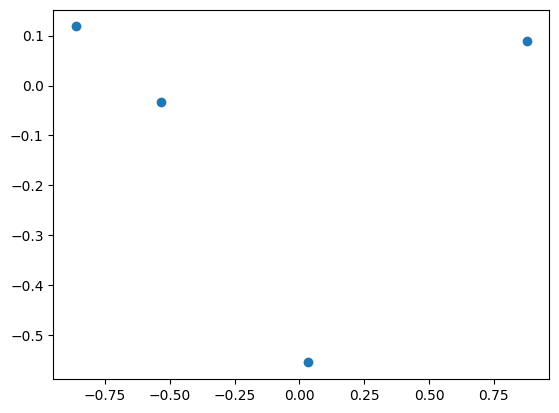

In [80]:
x1 = np.array(pro3.T)
y1 = np.array(pro2.T)

plt.scatter(y1, x1)
plt.show()

In [81]:
#Analyse duale (colonnes)

T=frequencies_matrix@ np.linalg.inv(Dp)@frequencies_matrix.T@np.linalg.inv(Dn)

print(T)


[[0.39092723 0.36085222 0.30635735 0.23773079]
 [0.18517417 0.17620217 0.16094797 0.13648117]
 [0.11891503 0.1217427  0.13079442 0.12160059]
 [0.30498358 0.34120291 0.40190025 0.50418746]]


In [82]:
#valeurs propres et vecteurs propres de T
valeurpropre, vecteurpropre = np.linalg.eig(T)
print(valeurpropre)
print(vecteurpropre)

[1.00000000e+00 1.91431541e-01 1.60480314e-16 1.06797414e-02]
[[-0.57167909 -0.59734775 -0.56576133 -0.43582742]
 [-0.29336164 -0.19032895  0.80299377  0.0621194 ]
 [-0.22190175  0.00865446 -0.17767344  0.79363519]
 [-0.7334041   0.77902224 -0.059559   -0.41992717]]


In [83]:
#calcul de phiM_j
phiM1=np.linalg.inv(Dn)@vecteurpropre[:,0]
phiM2=np.linalg.inv(Dn)@vecteurpropre[:,1]
phiM3=np.linalg.inv(Dn)@vecteurpropre[:,2]
phiM4=np.linalg.inv(Dn)@vecteurpropre[:,3]

In [84]:
#Les projections des profils  colonnes
proc1=np.linalg.inv(Dp)@frequencies_matrix.T@phiM1
proc2=np.linalg.inv(Dp)@frequencies_matrix.T@phiM2
proc3=np.linalg.inv(Dp)@frequencies_matrix.T@phiM3
proc4=np.linalg.inv(Dp)@frequencies_matrix.T@phiM4
print(np.array(proc3.T))

[[ 1.11022302e-16 -3.21964677e-15 -6.66133815e-16]]


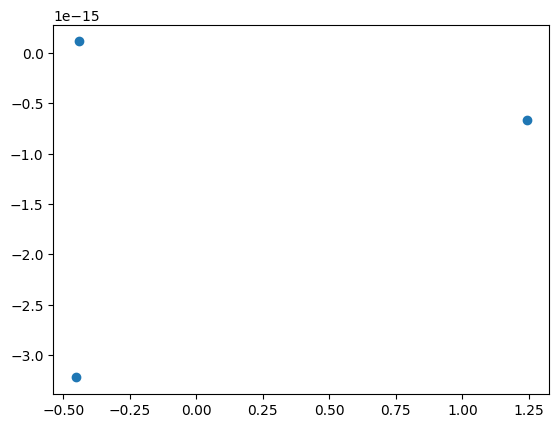

In [85]:

x = np.array(proc3.T)
y = np.array(proc2.T)

plt.scatter(y, x)
plt.show()

In [86]:
import prince

# Convert the kij matrix to a pandas dataframe
df_kij = pd.DataFrame(frequencies_matrix)

# Perform the correspondence analysis
ca = prince.CA(n_components=df_kij.shape[1])
ca = ca.fit(df_kij)

# Print the eigenvalues and the inertia
print(ca.eigenvalues_)
print(ca.total_inertia_)

[0.19143154 0.01067974]
0.20211128192044125


In [87]:

d=frequencies_without_margins.loc[frequencies_without_margins.index]

# analyses de correspondence 
afc=CA(row_labels=d.index,col_labels=d.columns,stats=True)
afc.fit(df.values)

CA(col_labels=Index(['Chatains', 'Roux', 'Blonds'], dtype='object'),
   row_labels=Index(['Marrons', 'Noisette', 'Verts', 'Bleus'], dtype='object'))

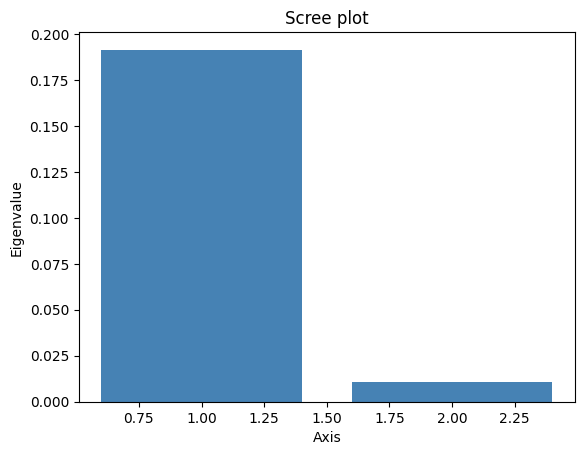

In [88]:
afc.plot_eigenvalues()

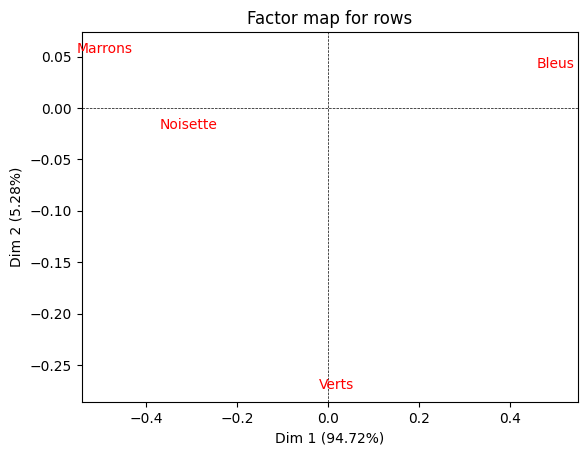

In [89]:
afc.mapping_row(num_x_axis=1,num_y_axis=2)

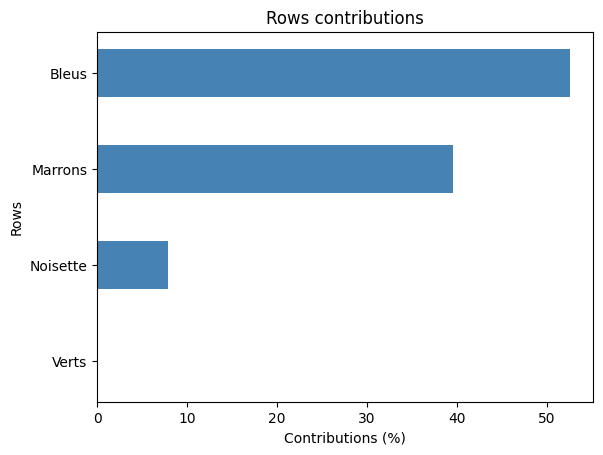

In [90]:
afc.plot_row_contrib(num_axis=1)

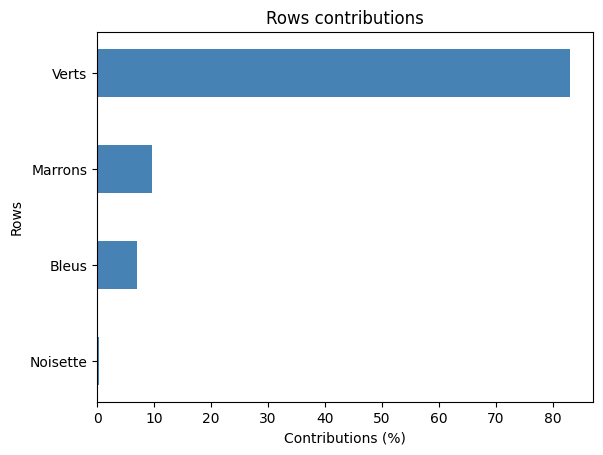

In [91]:
afc.plot_row_contrib(num_axis=2)

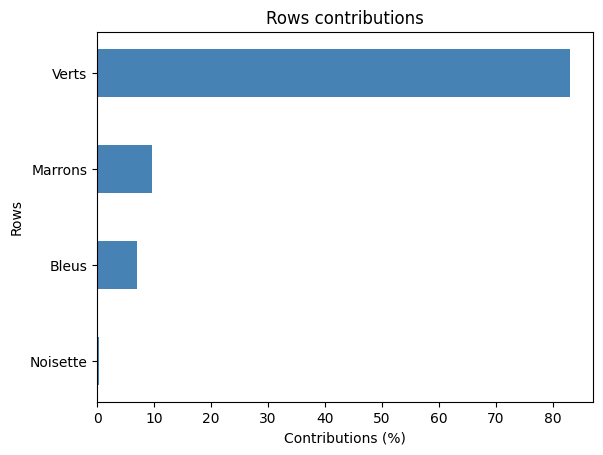

In [92]:
afc.plot_row_contrib(num_axis=0)

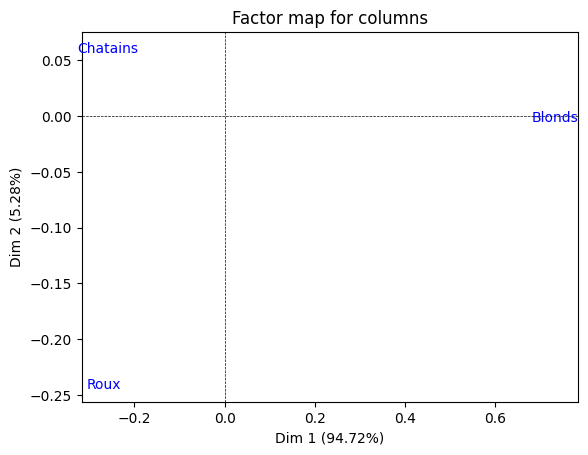

In [93]:
afc.mapping_col(num_x_axis=1,num_y_axis=2)

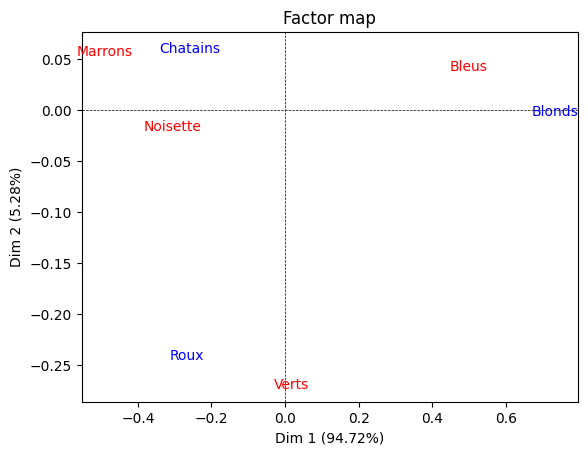

In [94]:
afc.mapping(num_x_axis=1,num_y_axis=2)